# Lab 13

In the last lab, we focused on the process of supervised learning, specifically spending time with the training and testing phases. Today, we examine the limitations of how a single iteration of train and test, and introduce the idea of cross-validation for addressing some of these weaknesses.

0. Detail limitations of "vanilla" train/test paradigm
1. Define and apply cross-validation


### Imports for Today

Today we are working with the data from last time. You can either import the data from the Lab 12 directory directly or by copying it into this directory. 

We begin as usual, importing the packages and data that we need. Still do **not** plot the data. 

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
from numpy import linalg as LA
import pandas as pd

import random 

from sklearn import linear_model

In [2]:
## Functions for later use

def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)


In [ ]:
# For function testing 




In [4]:
## Import Data
#  Move a copy of the data into this folder before running this block

mystery_data = pd.read_csv("../Lab12-TrainTest/lab12data.csv", sep = ",")
mystery_np = np.genfromtxt("../Lab12-TrainTest/lab12data.csv", delimiter=',', skip_header=1)


# DO NOT PLOT ANYTHING! 

In [5]:
# General x-values for fitting and plotting
x = np.linspace(np.min(mystery_np[:,1])-0.1, np.max(mystery_np[:,1])+0.1, 1000)
x = np.array([x]).T

x_mat = np.hstack([x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10])

### Training and Testing: What is the "right" approach?

In the last lab, we started to play with the intuition behind each of the train and test phases. You generated images of the training and testing errors for various proportions for the train and test sets. 

#### Warm-Up Part 1

Let's begin with a quick activity. Let's divide the data into 5 equal parts: 
* Set A - Rows 0:59
* Set B - Rows 60:119
* Set C - Rows 120:179
* Set D - Rows 180:239
* Set E - Rows 240:299

Assume the data follows a 2-degree polynomial, compute the training and testing errors where each set acts as the _testing_ set with the other four combined as the training set. Plot the training and test errors. What do you notice? 

In [6]:
# Dividing the data into the five sets
A_set = mystery_np[:60,:]
B_set = mystery_np[60:120,:]
C_set = mystery_np[120:180,:]
D_set = mystery_np[180:240,:]
E_set = mystery_np[240:,:]

In [10]:
# Computing train and test errors for where
#    each set acts as the testing data 
#    for a 2-degree polynomial

# Initial Train and test error lists
train_errors = []
test_errors = []


## =-=-=-=-=
## Set A is testing set 
## =-=-=-=-=
#  Everything else is in the training set:
trainA = np.vstack((B_set, C_set, D_set, E_set))
testA = A_set

# Fit model to training dataset
lm_A = linear_model.LinearRegression()
mod_A = lm_A.fit(trainA[:,1:3], trainA[:,0])

# Compute the training error 
train_predsA = mod_A.predict(trainA[:,1:3])
train_errorA = compute_mse(train_predsA, trainA[:,0])
train_errors.append(train_errorA)

# Compute the testing error
test_predsA = mod_A.predict(testA[:,1:3])
test_errorA = compute_mse(test_predsA, testA[:,0])
test_errors.append(test_errorA)


## =-=-=-=-=
## Set B is testing set:
## =-=-=-=-=
trainB = np.vstack((A_set, C_set, D_set, E_set))
testB = B_set

# Fit model to training dataset
lm_B = linear_model.LinearRegression()
mod_B = lm_B.fit(trainB[:,1:3], trainB[:,0])

# Compute the training error 
train_predsB = mod_B.predict(trainB[:,1:3])
train_errorB = compute_mse(train_predsB, trainB[:,0])
train_errors.append(train_errorB)

# Compute the testing error
test_predsB = mod_B.predict(testB[:,1:3])
test_errorB = compute_mse(test_predsB,testB[:,0])
test_errors.append(test_errorB)

## =-=-=-=-=
## Set C is testing set:
## =-=-=-=-=
trainC = np.vstack((A_set, B_set, D_set,E_set))
testC = C_set

# Fit model to training dataset
lm_C = linear_model.LinearRegression()
mod_C = lm_C.fit(trainC[:,1:3], trainC[:,0])

# Compute the training error 
train_predsC = mod_C.predict(trainC[:,1:3])
train_errorC = compute_mse(train_predsC, trainC[:,0])
train_errors.append(train_errorC)

# Compute the testing error
test_predsC = mod_C.predict(testC[:,1:3])
test_errorC = compute_mse(test_predsC,testC[:,0])
test_errors.append(test_errorC)

## =-=-=-=-=
## Set D is testing set:
## =-=-=-=-=
trainD = np.vstack((A_set, B_set, C_set,E_set))
testD = D_set

# Fit model to training dataset
lm_D = linear_model.LinearRegression()
mod_D = lm_D.fit(trainD[:,1:3], trainD[:,0])

# Compute the training error 
train_predsD = mod_D.predict(trainD[:,1:3])
train_errorD = compute_mse(train_predsD, trainD[:,0])
train_errors.append(train_errorD)

# Compute the testing error
test_predsD = mod_D.predict(testD[:,1:3])
test_errorD = compute_mse(test_predsD,testD[:,0])
test_errors.append(test_errorD)

## =-=-=-=-=
## Set E is testing set:
## =-=-=-=-=

trainE = np.vstack((A_set, B_set, C_set,D_set))
testE = E_set

# Fit model to training dataset
lm_E = linear_model.LinearRegression()
mod_E = lm_E.fit(trainE[:,1:3], trainE[:,0])

# Compute the training error 
train_predsE = mod_E.predict(trainE[:,1:3])
train_errorE = compute_mse(train_predsE, trainE[:,0])
train_errors.append(train_errorE)

# Compute the testing error
test_predsE = mod_E.predict(testE[:,1:3])
test_errorE = compute_mse(test_predsE,testE[:,0])
test_errors.append(test_errorE)

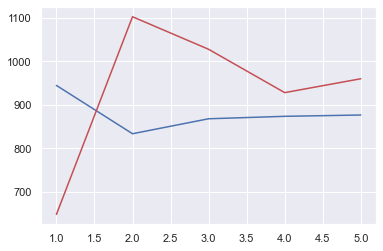

In [11]:
# Plot the training and testing errors in order 
# of the Sets A, B, C, D, E as the test set

plt.plot(list(range(1,6)), train_errors, c="b")
plt.plot(list(range(1,6)), test_errors, c="r")   

**Question:** Given these plots, what statements/questions/concerns do you have about how we split data into train and test? 

(Spot for your notes)

#### Warm-Up Part 2 

Repeat part 1, but for a 3-degree polynomial and for a 4-degree polynomial. I would strongly recommend that you copy and paste the code below, instead of just rerunning the above blocks. Again, below each plot, answer the question from part 1 (copied below). 

In [12]:
# Computing train and test errors for where
#    each set acts as the testing data 
#    for a 3-degree polynomial

# Initial Train and test error lists
train_errors3 = []
test_errors3 = []


## =-=-=-=-=
## Set A is testing set 
## =-=-=-=-=
#  Everything else is in the training set:
trainA = np.vstack((B_set, C_set, D_set, E_set))
testA = A_set

# Fit model to training dataset
lm_A = linear_model.LinearRegression()
mod_A = lm_A.fit(trainA[:,1:4], trainA[:,0])

# Compute the training error 
train_predsA = mod_A.predict(trainA[:,1:4])
train_errorA = compute_mse(train_predsA, trainA[:,0])
train_errors3.append(train_errorA)

# Compute the testing error
test_predsA = mod_A.predict(testA[:,1:4])
test_errorA = compute_mse(test_predsA, testA[:,0])
test_errors3.append(test_errorA)


## =-=-=-=-=
## Set B is testing set:
## =-=-=-=-=
trainB = np.vstack((A_set, C_set, D_set, E_set))
testB = B_set

# Fit model to training dataset
lm_B = linear_model.LinearRegression()
mod_B = lm_B.fit(trainB[:,1:4], trainB[:,0])

# Compute the training error 
train_predsB = mod_B.predict(trainB[:,1:4])
train_errorB = compute_mse(train_predsB, trainB[:,0])
train_errors3.append(train_errorB)

# Compute the testing error
test_predsB = mod_B.predict(testB[:,1:4])
test_errorB = compute_mse(test_predsB,testB[:,0])
test_errors3.append(test_errorB)

## =-=-=-=-=
## Set C is testing set:
## =-=-=-=-=
trainC = np.vstack((A_set, B_set, D_set,E_set))
testC = C_set

# Fit model to training dataset
lm_C = linear_model.LinearRegression()
mod_C = lm_C.fit(trainC[:,1:4], trainC[:,0])

# Compute the training error 
train_predsC = mod_C.predict(trainC[:,1:4])
train_errorC = compute_mse(train_predsC, trainC[:,0])
train_errors3.append(train_errorC)

# Compute the testing error
test_predsC = mod_C.predict(testC[:,1:4])
test_errorC = compute_mse(test_predsC,testC[:,0])
test_errors3.append(test_errorC)

## =-=-=-=-=
## Set D is testing set:
## =-=-=-=-=
trainD = np.vstack((A_set, B_set, C_set,E_set))
testD = D_set

# Fit model to training dataset
lm_D = linear_model.LinearRegression()
mod_D = lm_D.fit(trainD[:,1:4], trainD[:,0])

# Compute the training error 
train_predsD = mod_D.predict(trainD[:,1:4])
train_errorD = compute_mse(train_predsD, trainD[:,0])
train_errors3.append(train_errorD)

# Compute the testing error
test_predsD = mod_D.predict(testD[:,1:4])
test_errorD = compute_mse(test_predsD,testD[:,0])
test_errors3.append(test_errorD)

## =-=-=-=-=
## Set E is testing set:
## =-=-=-=-=

trainE = np.vstack((A_set, B_set, C_set,D_set))
testE = E_set

# Fit model to training dataset
lm_E = linear_model.LinearRegression()
mod_E = lm_E.fit(trainE[:,1:4], trainE[:,0])

# Compute the training error 
train_predsE = mod_E.predict(trainE[:,1:4])
train_errorE = compute_mse(train_predsE, trainE[:,0])
train_errors3.append(train_errorE)

# Compute the testing error
test_predsE = mod_E.predict(testE[:,1:4])
test_errorE = compute_mse(test_predsE,testE[:,0])
test_errors3.append(test_errorE)

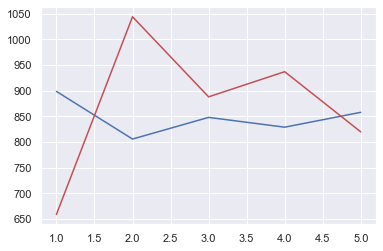

In [13]:
# Plot the training and testing errors in order 
# of the Sets A, B, C, D, E as the test set

plt.plot(list(range(1,6)), train_errors3, c="b")
plt.plot(list(range(1,6)), test_errors3, c="r")   

**Question:** Given these plots, what statements/questions/concerns do you have about how we split data into train and test? 

(Spot for your notes)

In [14]:
# Computing train and test errors for where
#    each set acts as the testing data 
#    for a 4-degree polynomial


# Initial Train and test error lists
train_errors4 = []
test_errors4 = []


## =-=-=-=-=
## Set A is testing set 
## =-=-=-=-=
#  Everything else is in the training set:
trainA = np.vstack((B_set, C_set, D_set, E_set))
testA = A_set

# Fit model to training dataset
lm_A = linear_model.LinearRegression()
mod_A = lm_A.fit(trainA[:,1:5], trainA[:,0])

# Compute the training error 
train_predsA = mod_A.predict(trainA[:,1:5])
train_errorA = compute_mse(train_predsA, trainA[:,0])
train_errors4.append(train_errorA)

# Compute the testing error
test_predsA = mod_A.predict(testA[:,1:5])
test_errorA = compute_mse(test_predsA, testA[:,0])
test_errors4.append(test_errorA)


## =-=-=-=-=
## Set B is testing set:
## =-=-=-=-=
trainB = np.vstack((A_set, C_set, D_set, E_set))
testB = B_set

# Fit model to training dataset
lm_B = linear_model.LinearRegression()
mod_B = lm_B.fit(trainB[:,1:5], trainB[:,0])

# Compute the training error 
train_predsB = mod_B.predict(trainB[:,1:5])
train_errorB = compute_mse(train_predsB, trainB[:,0])
train_errors4.append(train_errorB)

# Compute the testing error
test_predsB = mod_B.predict(testB[:,1:5])
test_errorB = compute_mse(test_predsB,testB[:,0])
test_errors4.append(test_errorB)

## =-=-=-=-=
## Set C is testing set:
## =-=-=-=-=
trainC = np.vstack((A_set, B_set, D_set,E_set))
testC = C_set

# Fit model to training dataset
lm_C = linear_model.LinearRegression()
mod_C = lm_C.fit(trainC[:,1:5], trainC[:,0])

# Compute the training error 
train_predsC = mod_C.predict(trainC[:,1:5])
train_errorC = compute_mse(train_predsC, trainC[:,0])
train_errors4.append(train_errorC)

# Compute the testing error
test_predsC = mod_C.predict(testC[:,1:5])
test_errorC = compute_mse(test_predsC,testC[:,0])
test_errors4.append(test_errorC)

## =-=-=-=-=
## Set D is testing set:
## =-=-=-=-=
trainD = np.vstack((A_set, B_set, C_set,E_set))
testD = D_set

# Fit model to training dataset
lm_D = linear_model.LinearRegression()
mod_D = lm_D.fit(trainD[:,1:5], trainD[:,0])

# Compute the training error 
train_predsD = mod_D.predict(trainD[:,1:5])
train_errorD = compute_mse(train_predsD, trainD[:,0])
train_errors4.append(train_errorD)

# Compute the testing error
test_predsD = mod_D.predict(testD[:,1:5])
test_errorD = compute_mse(test_predsD,testD[:,0])
test_errors4.append(test_errorD)

## =-=-=-=-=
## Set E is testing set:
## =-=-=-=-=

trainE = np.vstack((A_set, B_set, C_set,D_set))
testE = E_set

# Fit model to training dataset
lm_E = linear_model.LinearRegression()
mod_E = lm_E.fit(trainE[:,1:5], trainE[:,0])

# Compute the training error 
train_predsE = mod_E.predict(trainE[:,1:5])
train_errorE = compute_mse(train_predsE, trainE[:,0])
train_errors4.append(train_errorE)

# Compute the testing error
test_predsE = mod_E.predict(testE[:,1:5])
test_errorE = compute_mse(test_predsE,testE[:,0])
test_errors4.append(test_errorE)

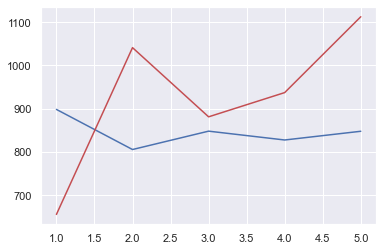

In [15]:
# Plot the training and testing errors in order 
# of the Sets A, B, C, D, E as the test set

plt.plot(list(range(1,6)), train_errors4, c="b")
plt.plot(list(range(1,6)), test_errors4, c="r")   

**Question:** Given these plots, what statements/questions/concerns do you have about how we split data into train and test? 

(Spot for your notes)

#### Warm-up Part 3 
Now, make one plot with three lines for the testing errors in order of the Sets A, B, C, D, E as the test sets. 

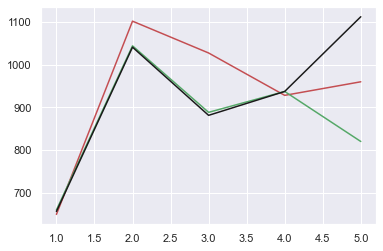

In [17]:
# Three testing error lines on one plot
plt.plot(list(range(1,6)), test_errors, c="r") 
plt.plot(list(range(1,6)), test_errors3, c="g") 
plt.plot(list(range(1,6)), test_errors4, c="k") 

Before continuing answer a few questions:    
**Q1:** What surprises you about this plot?   
**A1:** 

**Q2:** Which training set is the right one? Why?     
**A2:** 

**Q3:** Of these three polynomial degrees (2,3,4), which is the best one for this data? Why?     
**A3:** 

Check in with your group. Where do you agree? Where do you disagree? 

## Limitations for the train and test paradigm

It can be very surprising that the training and testing errors can vary so wildly depending on what data is in the training set and what data is in the testing set. This is because of the _variance_ that is inherent in any model about data, due to the variations in data. Recalling that the goal of any machine learning algorithm is to uncover some underlying truth about our data, in seeking this truth, we can't rely on having the "right" training data. Instead, we need to have methods that are robust to variations in our data; in other words, we want to feel confident that our discoveries are good regardless of the data that we train on. 

Our goal with the `mystery_data` is to uncover the polynomial relationship between `mysty` and `myst`. In Lab 12, we divided our data into train and test. Then for degrees between 1 and 10, we used the training data to find a polynomial relationship, and used the testing set to see how this found relationship might generalize to new data. We noticed a few things:
* The training error went down as we increased the degree of the polynomial
* The test error dropped for a bit and then increased, as we increased the degree of the polynomial

In Lab 12, we also experimented with the proportion of the data that we classified as the training set. Then in the first part of this lab, we investigated which part of the data is the "right" training data. With the goal of trying to uncover the "right" polynomial relationship for `mysty` and `myst`, we have felt less than satisfied with our choices. (Note, this was intentional.) 

With the goal of figuring out the "right" polynomial for `mysty` and `myst`, we have to determine the correct degree (or shape) for our polynomial model. 

_Side Question:_ what is the degree of the polynomial: parameter or hyperparameter? 

If we rely solely on training error or choose the wrong training set, we risk overfitting to our training data. We need something that will punish us for adding degrees for the sake of adding degrees, but also reward us for adding the right number of degrees. So what are we to do? 

## Cross-Validation

**Cross-Validation** is an iterative version of the train/test paradigm where each data point has a turn in the training set. There are a few varieties of _cross-validation_ (also colloquially called cross-val), but they all have the same basic structure:

0. Choose the model that you want to validate (ie. see how it would generalize to new data)
1. Divide your data into $k$ equal pieces (Note that there are many ways to do this!)
2. Do the following $k$ times: 
   * Select the $i^{\textrm{th}}$ piece of the dataset to be the test set
   * The rest of the pieces are your training set
   * Fit your model on the training set
   * Compute the test error (ie. MSE) and call this the $i^{\textrm{th}}$ test error
   * Add the $i^{\textrm{th}}$ test error to a list of test errors
3. Compute the average of the test errors, which is called the **cross-validated error.** 

When $k$ does not equal the number of data points, we call this **$k$-fold cross-validation.** The _folds_ are the pieces that serve as the test data. 

When $k$ equals the number of data points, we call this **leave one out cross validation** (or LOOCV). In this set-up, each iteration of the cross-validation holds out exactly one datapoint as the test set. 

### Implementing $k$-fold Cross-Validation

Returning to the warm-up for this lab, notice that we have already done all but the last step for a 5-fold cross-validation. 

Compute the _cross-validated_ error for degree 2, 3, and 4 degree polynomials. 

In [ ]:
# Compute the average for the testing errors for the 
# degree 2, 3, and 4 degree polynomials from the warm up

### Implementing Leave One Out Cross-Validation

Referring to the warm up code, implement LOOCV and compute the _cross-validated_ error for degree 2, 3, and 4 degree polynomials. In other words, loop over all the datapoints allowing each one to act as the only point in the test set, meaning that all the other points are the training points. 

_Hint:_ You may find lab 12 helpful for code that excludes some indices from consideration. 

In [ ]:
# LOOCV implementation 

# Find the number of data points in your data
n_data = mystery_np.shape[0]

# Initialize the list of errors
test_errors = []


# Loop over all points in the data set, letting each act as the test set
for i in range(n_data):
    
    # Split data into train and test
    test_data = 
    train_data = 
    
    # Create and train a model
    lm= linear_model.LinearRegression()
    mod = lm.fit(train_data[:,1:3], train_data[:,0])
    
    # Compute the testing error and add it to the list of testing errors
    preds = mod.predict(test_data[:,1:3])
    t_error = compute_mse(test_data[:,0],preds)
    
    test_errors.append(t_error)
    

# Compute the cross-val error
np.mean(test_errors)

## Cross-Validation fun facts

Notice that the cross-validated error is computed as the average of the testing errors. This means the cross-validated error will go down as we add useful degrees (or input variables) and sharply increase when we add a "junk" degree (or input variable). 

Additionally by relying on all of the possible testing errors, the cross-validated error is less sensitive to the selection of the training and testing sets, then any single train/test split. This means that the cross-validated error gives us a more robust value for how our model will generalize to new data. 

### Next time

Next time, we will _finally_ get away from linear regression kinds of things, and start exploring **Support Vector Machines**.

### Final Thoughts

To finish up this lab, share what you think the right polynomial degree for our mystery data is. Share your answer in a post on **#lab-13-submission** channel on slack with your answer. After you post, look at the notebook in the Lab12 folder that created the data. Compare your result to how the data was created. Using the thread function on slack, post a reaction to seeing the "answer." 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab13**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/)
1. [SDS 293 Notes by R. Jordan Crouser](http://www.science.smith.edu/~jcrouser/SDS293/)